# 어제 오른 내 주식, 과연 내일은?

## 13-1 들어가며
시계열 예측을 다루는 여러가지 통계적 기법 중에서  
ARIMA(Auto-Regressive Integrated Moving Average)에 대해서 알아보고  
이를 이용해서 특정 주식 종목 예측해보자!  
다른 모델로는 Porphet과 LSTM(딥러닝)을 이용한 방법도 있지만,  
ARIMA는 통계학 이론적인 기반이 있어서 다룰만 하다.

### 학습 목표
----------------------------------------------------------------------------
1. 시계열 데이터의 특성과 안정적인(Stationary) 시계열의 개념을 이해  
2. ARIMA 모델을 구성하는 AR, MA, Diffencing 개념을 이해하고 간단한 시계열 데이터에 적용
3. 실제 주식 데이터에 ARIMA를 적용해보고 예측 정확도를 확인


### 목차
----------------------------------------------------------------------------
1. 시계열 예측이란
    * 미래를 예측하는 것은 가능할까?
    * Stationary한 시계열 데이터란?
    * 시계열 데이터 사례분석
    * Stationary 여부를 체크하는 통계적 방법
2. ARIMA 시계열 예측
    * 시계열 예측의 기본 아이디어:Stationary하게 만들 방법은 없을까?
    * ARIMA 모델의 개념
    * ARIMA 모델 훈련과 추론
3. 프로젝트: 주식 예측에 도전해보자

## 13-2 시계열 예측이란(1)미래를 예측한다는 것은 가능할까?
미래 정보를 남들보다 빨리 알 수 있다면 얼마나 좋을까?  
우리는 다음과 같은 미래 예측 시나리오를 생각해볼 수 있다.  
    * 지금까지의 주가변곡선을 바탕으로 다음 주가변동 예측  
    * 특정 지역의 기후데이터를 바탕으로 내일의 온도변화 예측  
    * 공장 센터데이터의 변화이력을 토대로 이상 발생 예측  

위 3가지는 모두 예측의 근거가 시계열 데이터라는 점이다.  
시계열이란 시간 순서대로 발생한 데이터의 수열을 의미한다.  
간단한 수식은 아래와 같다.
Y = {Yt : t ∈ T}, where T is the index set.  
꼭 일정한 간격으로 발생한 데이터일 필요는 없다.  

미리 갖고 있는 데이터로 예측을 하려면 2가지 전제가 필요.  
1. 과거의 데이터에 일정한 패턴이 발견된다. 과거의 패턴은 미래에도 동일하게 반복될 것이다.  
2. 안정적(Stationary)데이터에 대해서만 미래예측이 가능하다.  

여기서 안정적의 의미는 시계열 데이터의 통계적인 특성이 변하지 않음을 의미.

시계열 데이터 분석은 완벽한 미래 예측을 보장하지 않지만(외부 변수에 의해서 안정성이 훼손될 수 있으므로) 프로세스의 내재적인 시간적 변화를 묘사하는 데 좋기에 사용한다.


## 13-3 시계열 예측이란(2)Stationary한 시계열 데이터  
현실에서 다루는 시계열 데이터는 아래 3가지 직관적인 안정성만 만족하면 ARIMA 등의 모델을 사용할 수 있다.  
1. 시간의 추이와 관계없이 평균이 불변  
2. 시간의 추이와 관계없이 분산이 불변  
3. 두 시점 간의 자기공분산이 기준시점과 무관

분산, 공분산, 상관계수, 자기공분산, 자기상관계수에 대해 알아보자.  
평균은 분포의 중간을 의미하고  
분산은 분포가 얼마나 퍼져있는지를 뜻한다.  
확률변수가 2가지일때 이 확률분포들이 어떤 모양으로 되어있는지 알고 싶을 때 X의 평균, Y의 평균을 본다.(m_x, m_y)
각 확률변수가 어떻게 퍼져있는지 나타내는 것이 공분산  
Cov(X,Y) > 0 X가 증가할때 Y도 증가  
Cov(X, Y) < 0 X가 증가 할 때 Y는 감소한다.  
Cov(X, Y) = 0 공분산이 0이라면 두 변수간에는 아무런 선형관계가 없으며 두 변수는 서로 독립적인 관계에 있음을 알 수 있다. 그러나 두 변수가 독립적이라면 공분산은 0이 되지만, 공분산이 0이라고 해서 항상 독립적이라고 할 수 없다.  
Cov(X, Y)=E(((X-X의 평균(기댓값))(Y-Y의 평균(기댓값)))  
공분산은 X의 편차와 Y의 편차를 곱한것의 평균
공분산의 문제는 X, Y의 크기에 영향을 받는것.
이를 보완하기 위해 상관계수가 등장.  
<img src="상관계수.png">
    
    1. 상관계수의 절대값은 1을 넘을 수 없다.  
    2. 확률변수 X, Y가 독립이라면 상관계수는 0이다.  
    3. X와 Y가 선형적 관계라면 상관계수는 1 혹은 -1이다.(양의 선형관계면 1, 음의 선형관계면 -1)
    
안정적인 데이터라는 전제하에 X(t)와 X(t+h)의 공분산=X(t)와 X(t-h)의 공분산]
자기 공분산이라고 하는 이유는 X(t), X(t+h)는 일정시차를 둔 자기와의 공분산이므로.
안정적인 시계열은 t에 상관없이 h에 대해서만 달려져야 한다.

## 13-4 시계열 예측이란(3)시계열 데이터  사례분석
```
$ mkdir -p ~/aiffel/stock_prediction/data
$ wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
$ wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
$ mv daily-min-temperatures.csv airline-passengers.csv ~/aiffel/stock_prediction/data
```

### 시계열(Time Series)생성
---------------------------------------------------------------------------
처음 다룰 데이터는 일별 멜버른의 최저기온입니다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
print('슝=3')

시계열도 결국 시간 컬럼을 index로 가진 Series로 표현.  
우리는 Pandas의 DataFrame으로 변환해서 불러왔다.

In [ ]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/daily-min-temperatures.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

In [ ]:
# 이번에는 Date를 index_col로 지정해 주었습니다. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

In [ ]:
#우리가 찾는 시계열
#DataFrame, Series는 index구조가 동일하여 호환이 되나 가끔 호환이 안되는 경우가 있으므로
#명확하게 명시해서 진행.
ts1 = df['Temp']
print(type(ts1))
ts1.head()

### 시계열 안정성의 정성적 분석
---------------------------------------------------------------------------

In [ ]:
# 시각화를 통한 안정성 여부 확인
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts1)

In [ ]:
#결측치 확인
ts1[ts1.isna()]  # 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력합니다.

결측치가 있으면 통계오류를 불러오므로 조치가 필요
1. 결측치가 있는 데이터를 모두 삭제(drop)
2. 결측치 앞뒤 값을 이용해서 보간, 대입

In [ ]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts1=ts1.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인합니다.
print(ts1[ts1.isna()])

# 다시 그래프를 확인해봅시다!
plt.plot(ts1)
# 시각적으로 패턴이 보이는 것 같지만, 확실하지 않으므로 좀더 명료하게 시각화 필요!

In [ ]:
# 일정 시간내 구간 통계치 시각화.
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

In [ ]:
plot_rolling_statistics(ts1, window=12)
#좀더 통계적인 접근이 필요해 보임

### 다른 데이터에 대해서도 비교해보자
---------------------------------------------------------------------------
국제 공항 여행객 데이터셋에 대해서 알아보자

In [ ]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/airline-passengers.csv' 
df = pd.read_csv(dataset_filepath, index_col='Month', parse_dates=True).fillna(0)  
print(type(df))
df.head()

In [ ]:
ts2 = df['Passengers']
plt.plot(ts2)
# 시간 추이에 따라 평균과 분산이 지속적으로 증가.

In [ ]:
plot_rolling_statistics(ts2, window=12)
#결과를 보면 안정적이지 않음은 알 수 있다. 
#추후에 이런 불안정적인 시계열 데이터에 대한 분석기법에 다룰 것이다.

결론적으로 시각화가 시계열 데이터를 다루는 가장 기본적인 접근이나, **안정성을 평가하기 위해서는 좀더 정량적인 방법을 써야 할것이다.**

## 시계열 예측이란(4) Stationary 여부를 체크하는 통계적 방법

Augmented Dickery-Fuller Test  
---------------------------------------------------------------------------

----------------------------------------------------------------------------

주어진 시계열 데이터가 안정적이지 않다는 귀무가설(Null Hypothesis)를 세운뒤에, 통계적 가설 검증
과정을 통해 귀무가설이 틀린 것을 보여 해당 시계열 데이터가 안정적이라는 대립가설을 채택.  
우리는 statsmodels의 adfuller 메소드를 통해서 ADF Test결과를 이용.  
p-value(유의확률)이 0.05미만으로 나오면 귀무가설 기각, 대립가설 채택.

statsmodels 패키지와 adfuller 메소드  
---------------------------------------------------------------------------

---------------------------------------------------------------------------

statsmodels 패키지는 통계적인 기능을 파이썬에서 쓸 수 있도록 한 통계패키지.  
```
$ pip install statsmodels
```

In [ ]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

In [ ]:
augmented_dickey_fuller_test(ts1)
# p-value가 거의 0에 가깝게 나타났기에 안정적이지 않다는 귀무가설 기각->안정적이다.

In [ ]:
augmented_dickey_fuller_test(ts2)

## 13-6. 시계열 예측의 기본 아이디어: Stationary하게 만들 방법은 없을까?  
안정적이지 않은 데이터를 안정적인 시계열로 바꿔야 한다.  
1. 안정적인 특성을 가지도록 기존 데이터를 가공/변형  
2. 시계열 분해기법 적용.  


### 보다 Staionary한 시계열로 가공해 가기
---------------------------------------------------------------------------

In [ ]:
#분산이 커지는 경우 log변환을 하는 것이 좋다.
ts_log = np.log(ts2)
plt.plot(ts_log)

In [ ]:
augmented_dickey_fuller_test(ts_log)
#log 변환후에도 문제는 시간추이에 따른 평균은 계속 증가.

In [ ]:
# 시계열 분석에서 시간 추이에 따라 나타나는 평균값 변화를 추세(trend)라고 하낟.
# 이 변화량 제거를 위해서 rolling mean을 구해서 ts_log에서 뺴보자.
moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [ ]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(15)

In [ ]:
#Moving Average가 계산되지 않아 NaN이 나왔고, NaN을 그대로 놔두면 오류가 생기므로 제러
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

In [ ]:
#제거한 데이터를 시각화해보자.
plot_rolling_statistics(ts_log_moving_avg)

In [ ]:
augmented_dickey_fuller_test(ts_log_moving_avg)

p-value가 0.02로 줄어들었지만, 문제가 있다. 
이 값은 window=12일때만 되므로 다른 값에서는 문제가 생긴다.

In [ ]:
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)
print('슝=3')

In [ ]:
plot_rolling_statistics(ts_log_moving_avg_6)

In [ ]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)

 이 데이터는 월 단위로 발생하기에 window=12일때 적당하다고 추측가능하지만,  
 rolling mean을 구하기 위한 window 크기 결정이 중요!
 평균이 증가하는 추제(trend)를 제거했지만, 여전히 안정적이라고 할 수 없어서 다른 조치 필요  
 Moving Average 제거로 해결이 안되는 주기적 패턴을 계절성이라고 한다.
 계절성 상쇄를 위한 효과적인 방법이 차분(Differencing)
 시계열을 앞으로 평행이동시켜 현재스텝-이전스텝을 계산하여 이전 스텝에서의 변화량을 확인

In [ ]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

In [ ]:
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

In [ ]:
plot_rolling_statistics(ts_log_moving_avg_diff)

In [ ]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)
#데이터에 따라서 2차, 3차 차분을 적용해 p-value를 더욱 낮출 수 있다.

### 시계열 분해(Time series decomposition)
---------------------------------------------------------------------------

In [ ]:
#statsmodels의 seasonal_decompose를 통해 시계열의 trend, seasonality 추출가능
#일단 로그 변환한 이후에 적용
#original - trend - seasonality = residual
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [ ]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)
#residual의 p-value가 압도적으로 낮다.

## 13-7. ARIMA 모델의 개념  
---------------------------------------------------------------------------

### ARIMA 모델의 정의
---------------------------------------------------------------------------
앞에서 trend, seasonality를 제거하면 안정적인 시계열 데이터를 만들 수 있음을 확인
이 원리로 시계열 데이터 예측 모델을 자동으로 만들어 주는 것이 ARIMA  
ARIMA(Autoregressive Integrated Moving Average)  

1. AR(자기 회귀, Autoregressive)  
    * Yt가 이전 p개의 Yt-1, Yt-2, .... ,Yt-p의 가중합(가중치의 크기가 1보다 작은)으로 수렴한다고 생각.  
    * AR은 Residual에 해당하는 부분 모델링.  
    * 주식값이 일정한 평균을 유지한다고 할때 주식 시계열을 AR로 모델링.  
2. MA(이동 평균, Moving Average)
    * Yt가 이전 q개의 예측오차값으로 et-1, et-2, .... , et-q의 가중합으로 수렴
    * 일반적으로 trend에 해당하는 부분 모델링, et-1이 +면 예상보다 값이 높았다는 뜻이므로 예측값을 높인다.
    * 주식값이 항상 최근의 증감패턴이 지속될 거라고 보면 주식 시계열을 MA로 모델링
3. I(차분누적, Integration)
    * Yt가 이전 데이터와 d차 차분의 누적합이라고 생각.
    * 예를 들어서 d=1 이면 Yt = Yt-1 + ΔYt-1.
    * 일반적인 시계열에서 Seasonality에 해당.




### ARIMA 모델의 모수 p, q, d
--------------------------------------------------------------------------
p는 AR(자기회귀)의 시차, d는 차분(differnce), q는 MA(이동평균)의 시차.  
p + q < 2, p * q = 0(p 또는 q가 0) -> 대부분의 시계열 데이터가 자기회귀 또는 이동평균중하나의 경향만 띈다.  
결론적으로 p, d, q는 ACF(Autocorrelation Function)와 PACF(Partial Autocorrelation Function)를 통해 결정  
ACF(Autocorrelation Function)는 시차에 따른 관측치들의 관련성을 측정.  
PACF(Partial Autocorrelation Function)는 두 시차 관측치간의 관련성을 측정.  




In [ ]:
#국제 여객선 여행객 데이터 사용
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

아래 그림은 ACF를 통해 MA모델 시차q, PACF를 통해 AR모델의 시차p를 결정할 수 있음을 의미
<img src="ACF,PACF.png">
PACF 그래프를 볼때는 p=1이 적합, p가 2이상이 구간에서는 PACF가 0에 가까워짐.  
PACF가 0이라는 것은 현재데이터와 p만큼 떨어진 데이터의 상관도가 0이라는 뜻.  
ACF 그래프를 볼때는 점차 감소함으로 AR(1)모델과 유사함.  
q에 대한 적절한 값이 없어보이며 MA를 고려할 필요가 없다면 q=0으로 둘 수 있다.
하지만 q를 바꿔가며 확인해보는 것도 좋다.  
d차분을 구해보고 시계열이 안정적인지 확인


In [ ]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

In [ ]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)
#2차분이 1차분보다 안정적이지만, d=1부터 시도. 여러 d를 바꿔가며 최적값 찾자.

### 학습데이터 분리
--------------------------------------------------------------------------
시계열 데이터에서 학습데이터와 테스트데이터 나누기.(9:1)

In [ ]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [ ]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

## 13-8. ARIMA 모델 훈련과 추론
일단 p=1, d=1, q=0을 모수로 정하고 ARIMA모델 훈련

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

In [ ]:
# 훈련데이터에 잘 fit하는지 시각적으로 확인
fitted_m.plot_predict()

In [ ]:
#테스트 데이터 구간의 데이터를 예측
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [ ]:
#최종적인 모델의 오차율을 계산하려면 로그변환한 것을 원본으로 복원해 계산해야 한다.
#q=8일때 MAPE가 10%이고, q=12일때 더 좋을 것 같지만 데이터셋이 너무 작다.
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mㅇean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

## 13-9. 프로젝트: 주식 예측에 도전해 보자
데이터는 과거의 일자별 시세며 Yahoo Finance에서 다운로드한다.
```
$ mv ~/다운로드/005930.KS.csv ~/aiffel/stock_prediction/data
# 환경설정을 영어로 사용하는 경우는 아래 명령어를 입력하세요.
$ mv ~/Downloads/005930.KS.csv ~/aiffel/stock_prediction/data
```

### STEP 1: 시계열 데이터 준비
---------------------------------------------------------------------------
* 칼럼 종류: Date, Open(시작가), High(최고가), Low(최저가), Close(종가), Adj Close(수정종가), Volume(거래량)
* 우린 close만 사용.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']


ts.head()

Date
2000-01-04    6110.0
2000-01-05    5580.0
2000-01-06    5620.0
2000-01-07    5540.0
2000-01-10    5770.0
Name: Close, dtype: float64

### STEP 2: 각종 전처리 수행
---------------------------------------------------------------------------
* 결측치 처리
* 로그변환

In [65]:
# 결측치 처리(보간법)
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Close, dtype: float64)

In [66]:
# 로그 변환 시도 
ts_log = np.log(ts)

### STEP 3: 시계열 안정성 분석
---------------------------------------------------------------------------
* 정성적 그래프 분석
* 정량적 Augmented Dicky-Fuller Test
* 시계열 분해(Time Series Decomposition)
* Residual 안정성 확인

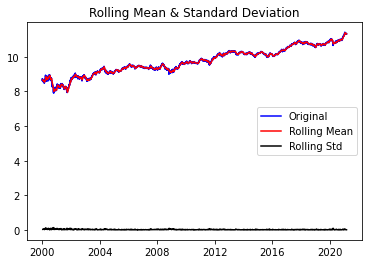

Results of Dickey-Fuller Test:
Test Statistic                   -0.325391
p-value                           0.921830
#Lags Used                        4.000000
Number of Observations Used    5313.000000
Critical Value (1%)              -3.431581
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567060
dtype: float64


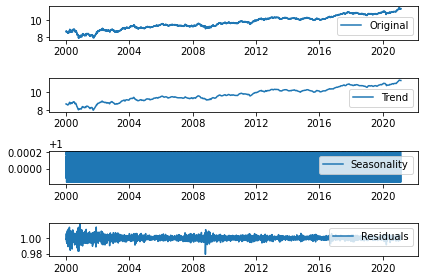

In [67]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 12) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [68]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -19.949736
p-value                           0.000000
#Lags Used                       33.000000
Number of Observations Used    5272.000000
Critical Value (1%)              -3.431591
Critical Value (5%)              -2.862088
Critical Value (10%)             -2.567062
dtype: float64


### STEP4: 학습, 테스트 데이터셋 생성
---------------------------------------------------------------------------
* 학습, 테스트 데이터셋 분리


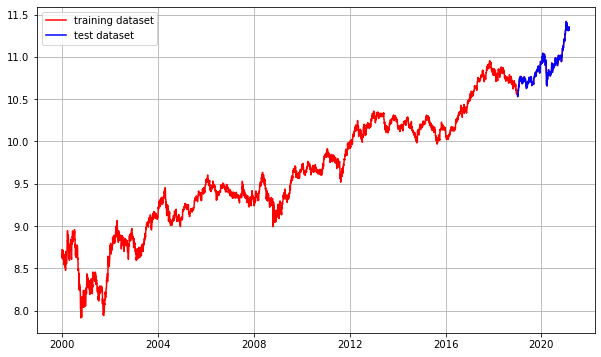

In [69]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

### STEP5: 적정 ARIMA 모수 찾기
---------------------------------------------------------------------------
* ACF, PACF 그려보기 -> p, q구하기
* 차분 안정성 확인 -> d 구하기

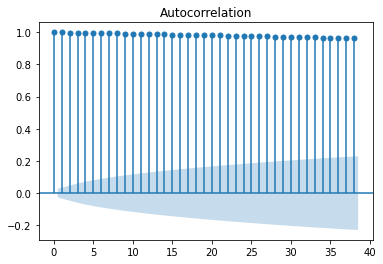

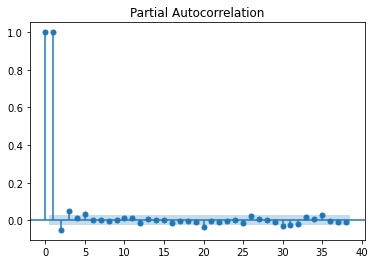

In [70]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -40.102097
p-value                           0.000000
#Lags Used                        3.000000
Number of Observations Used    5313.000000
Critical Value (1%)              -3.431581
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567060
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -21.827893
p-value                           0.000000
#Lags Used                       33.000000
Number of Observations Used    5282.000000
Critical Value (1%)              -3.431589
Critical Value (5%)              -2.862087
Critical Value (10%)             -2.567061
dtype: float64


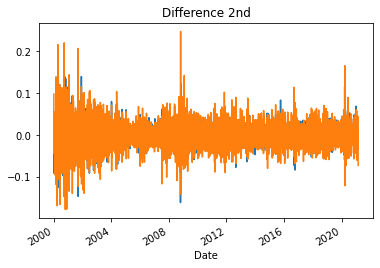

In [71]:
# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

### ARIMA 모델 훈련과 테스트
----------------------------------------------------------------------------
* ARIMA 모델 빌드 와 훈련
* 모델 테스트 및 플로팅
* 최종 예측 모델 정확도 측정(MAPE)

In [72]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4785
Model:                 ARIMA(1, 1, 0)   Log Likelihood               11277.411
Method:                       css-mle   S.D. of innovations              0.023
Date:                Tue, 02 Mar 2021   AIC                         -22548.823
Time:                        13:35:34   BIC                         -22529.403
Sample:                             1   HQIC                        -22542.001
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0004      0.000      1.111      0.266      -0.000       0.001
ar.L1.D.Close     0.0437      0.014      3.018      0.003       0.015       0.072
                                    Root

/home/ssac19/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/ssac19/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been prov

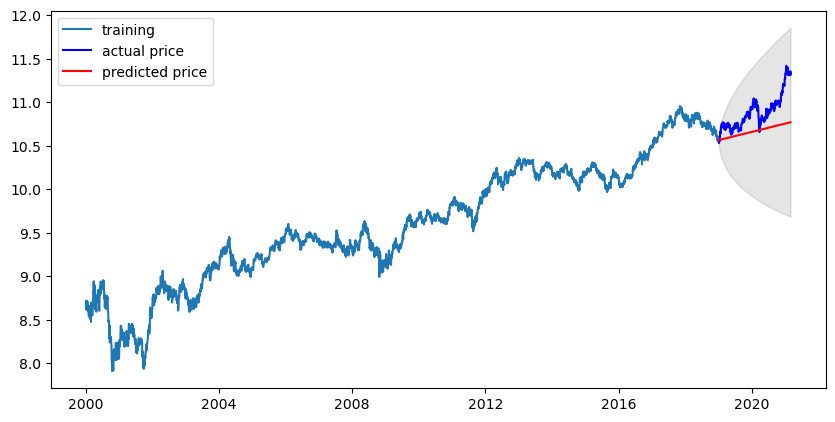

In [73]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  214746746.26469508
MAE:  11296.362313772373
RMSE:  14654.239873316359
MAPE: 18.68%


### STEP7:다른 주식 종목 예측해 보기
---------------------------------------------------------------------------
* 관심 종목을 골라 위 STEP 1~6 과정을 반복해보기

#### STEP 1: 시계열 데이터 준비
---------------------------------------------------------------------------
* 칼럼 종류: Date, Open(시작가), High(최고가), Low(최저가), Close(종가), Adj Close(수정종가), Volume(거래량)
* 우린 close만 사용.

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/066570.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']


ts.head()

Date
2002-04-24    55927.312500
2002-04-25    51413.882813
2002-04-26    53768.714844
2002-04-29    51217.644531
2002-04-30    50040.226563
Name: Close, dtype: float64

#### STEP 2: 각종 전처리 수행
---------------------------------------------------------------------------
* 결측치 처리
* 로그변환

In [155]:
# 결측치 처리(보간법)
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Close, dtype: float64)

In [156]:
# 로그 변환 시도 
ts_log = np.log(ts)

#### STEP 3: 시계열 안정성 분석
---------------------------------------------------------------------------
* 정성적 그래프 분석
* 정량적 Augmented Dicky-Fuller Test
* 시계열 분해(Time Series Decomposition)
* Residual 안정성 확인

In [422]:
# 일정 시간내 구간 통계치 시각화.
def plot_rolling_statistics(timeseries, window=24):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


In [423]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

슝=3


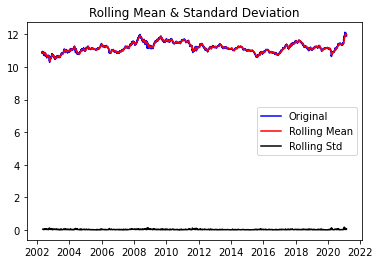

Results of Dickey-Fuller Test:
Test Statistic                   -2.383221
p-value                           0.146528
#Lags Used                        3.000000
Number of Observations Used    4713.000000
Critical Value (1%)              -3.431738
Critical Value (5%)              -2.862153
Critical Value (10%)             -2.567097
dtype: float64


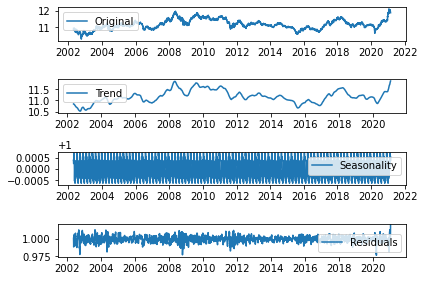

In [424]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 48) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [425]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.505143e+01
p-value                        9.281544e-28
#Lags Used                     3.200000e+01
Number of Observations Used    4.636000e+03
Critical Value (1%)           -3.431761e+00
Critical Value (5%)           -2.862164e+00
Critical Value (10%)          -2.567102e+00
dtype: float64


#### STEP4: 학습, 테스트 데이터셋 생성
---------------------------------------------------------------------------
* 학습, 테스트 데이터셋 분리


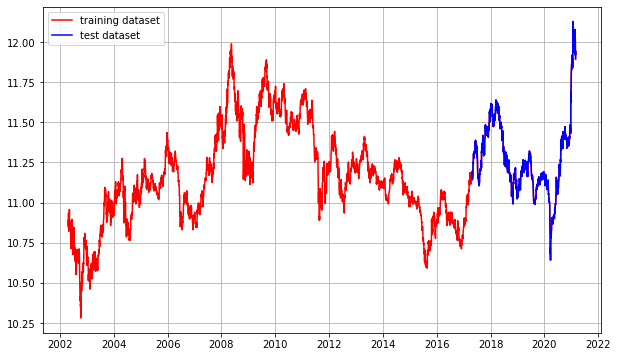

In [426]:
train_data, test_data = ts_log[:int(len(ts_log)*0.8)], ts_log[int(len(ts_log)*0.8):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

#### STEP5: 적정 ARIMA 모수 찾기
---------------------------------------------------------------------------
* ACF, PACF 그려보기 -> p, q구하기
* 차분 안정성 확인 -> d 구하기

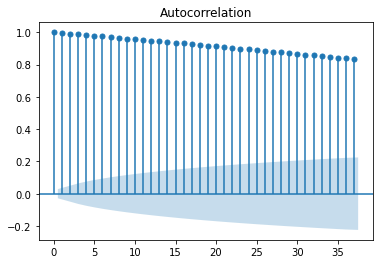

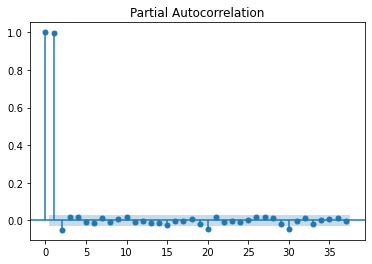

In [427]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -41.277211
p-value                           0.000000
#Lags Used                        2.000000
Number of Observations Used    4713.000000
Critical Value (1%)              -3.431738
Critical Value (5%)              -2.862153
Critical Value (10%)             -2.567097
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -21.638437
p-value                           0.000000
#Lags Used                       30.000000
Number of Observations Used    4684.000000
Critical Value (1%)              -3.431747
Critical Value (5%)              -2.862157
Critical Value (10%)             -2.567099
dtype: float64


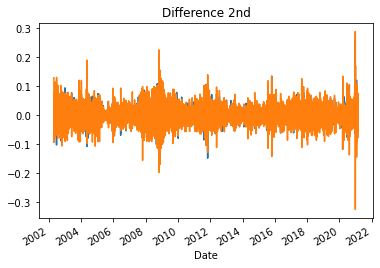

In [428]:
# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

#### STEP6: ARIMA 모델 훈련과 테스트
----------------------------------------------------------------------------
* ARIMA 모델 빌드 와 훈련
* 모델 테스트 및 플로팅
* 최종 예측 모델 정확도 측정(MAPE)

In [438]:
#### from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(9, 0, 6))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

/home/ssac19/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/ssac19/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been prov

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 3773
Model:                     ARMA(9, 6)   Log Likelihood                8751.052
Method:                       css-mle   S.D. of innovations              0.024
Date:                Tue, 02 Mar 2021   AIC                         -17468.104
Time:                        14:46:56   BIC                         -17362.098
Sample:                             0   HQIC                        -17430.416
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.1402      0.112     99.743      0.000      10.921      11.359
ar.L1.Close    -0.0236        nan        nan        nan         nan         nan
ar.L2.Close     0.8842        nan        nan    

/home/ssac19/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


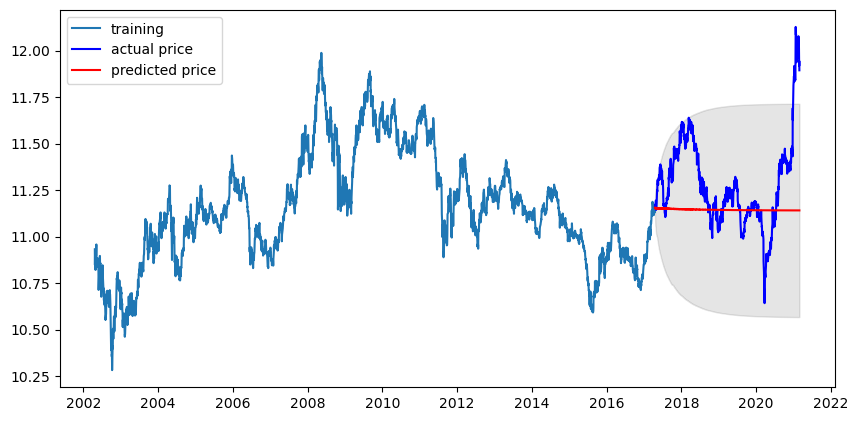

In [439]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [440]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  602042118.8701321
MAE:  15619.611731292804
RMSE:  24536.546596253764
MAPE: 16.45%


슝=3
슝=3


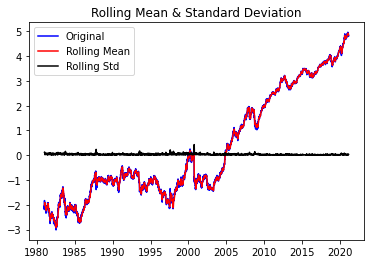

Results of Dickey-Fuller Test:
Test Statistic                     0.502217
p-value                            0.984940
#Lags Used                        14.000000
Number of Observations Used    10124.000000
Critical Value (1%)               -3.430996
Critical Value (5%)               -2.861826
Critical Value (10%)              -2.566922
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                   -24.822678
p-value                            0.000000
#Lags Used                        36.000000
Number of Observations Used    10072.000000
Critical Value (1%)               -3.430999
Critical Value (5%)               -2.861827
Critical Value (10%)              -2.566923
dtype: float64


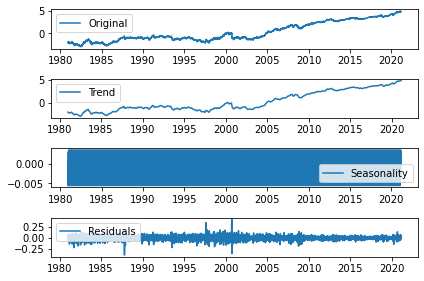

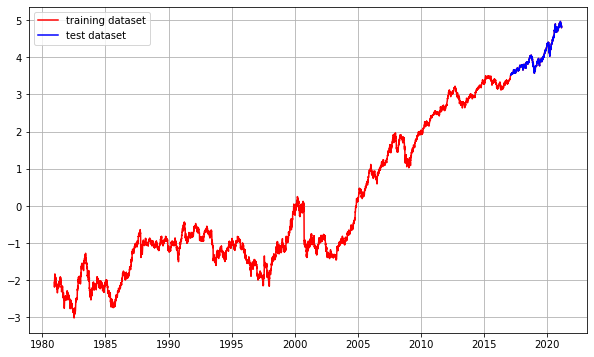

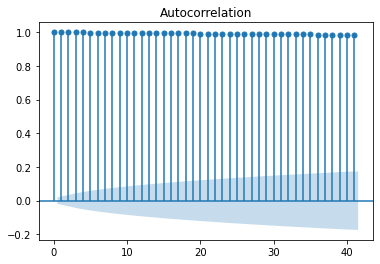

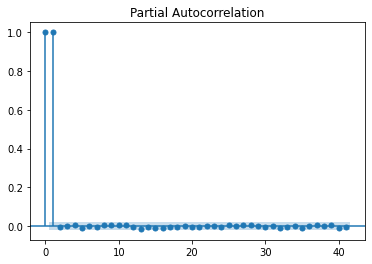

Results of Dickey-Fuller Test:
Test Statistic                   -25.670131
p-value                            0.000000
#Lags Used                        13.000000
Number of Observations Used    10124.000000
Critical Value (1%)               -3.430996
Critical Value (5%)               -2.861826
Critical Value (10%)              -2.566922
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                   -27.066114
p-value                            0.000000
#Lags Used                        39.000000
Number of Observations Used    10097.000000
Critical Value (1%)               -3.430998
Critical Value (5%)               -2.861826
Critical Value (10%)              -2.566922
dtype: float64


/home/ssac19/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/ssac19/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been prov

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                 9123
Model:                ARIMA(4, 2, 12)   Log Likelihood               19089.392
Method:                       css-mle   S.D. of innovations              0.030
Date:                Tue, 02 Mar 2021   AIC                         -38142.785
Time:                        14:58:39   BIC                         -38014.651
Sample:                             2   HQIC                        -38099.213
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.454e-07   9.25e-07      0.157      0.875   -1.67e-06    1.96e-06
ar.L1.D2.Close     -1.0687        nan        nan        nan         nan         nan
ar.L2.D2.Close     -1.0766      

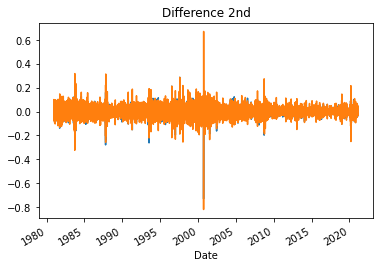

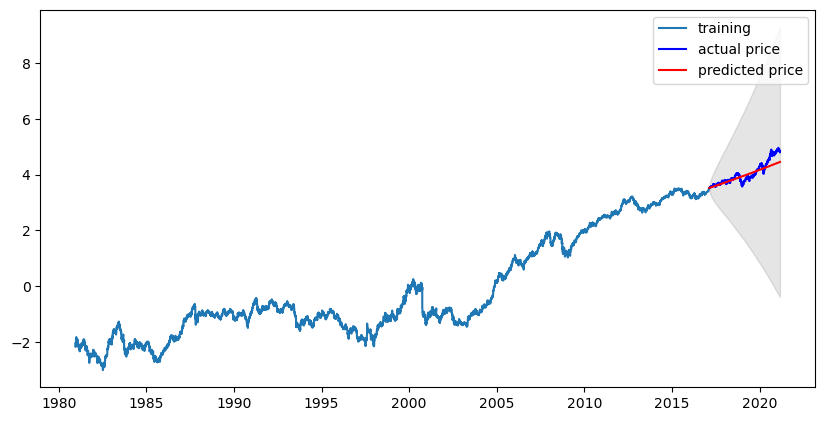

MSE:  304.6343015599907
MAE:  10.54942366089733
RMSE:  17.453776140422757
MAPE: 13.12%


In [474]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/AAPL.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']


ts.head()

# 결측치 처리(보간법)
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

# 로그 변환 시도 
ts_log = np.log(ts)

# 일정 시간내 구간 통계치 시각화.
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='additive', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(4, 2, 12))
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

슝=3
슝=3


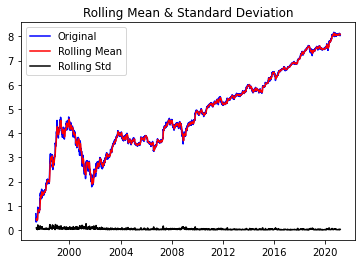

Results of Dickey-Fuller Test:
Test Statistic                   -1.584708
p-value                           0.491270
#Lags Used                       34.000000
Number of Observations Used    5952.000000
Critical Value (1%)              -3.431449
Critical Value (5%)              -2.862026
Critical Value (10%)             -2.567029
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -19.597061
p-value                           0.000000
#Lags Used                       34.000000
Number of Observations Used    5922.000000
Critical Value (1%)              -3.431455
Critical Value (5%)              -2.862028
Critical Value (10%)             -2.567030
dtype: float64


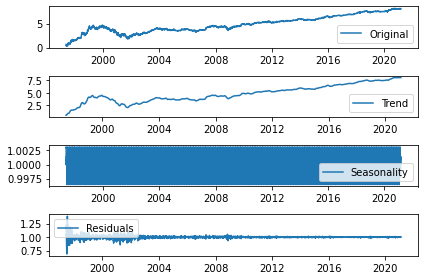

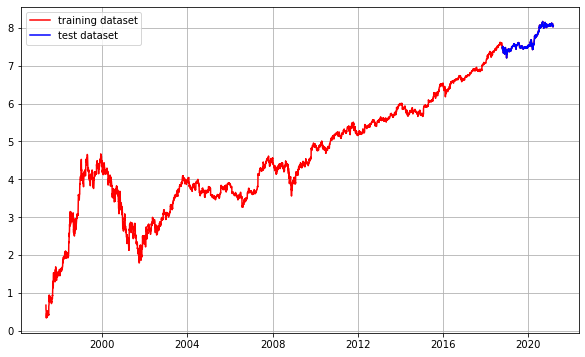

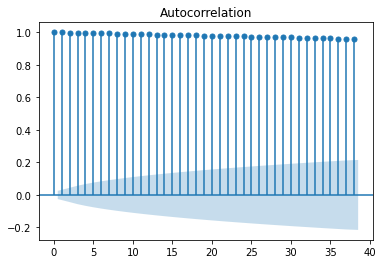

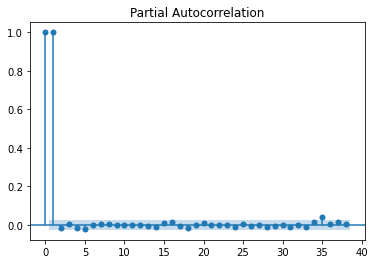

Results of Dickey-Fuller Test:
Test Statistic                -1.318768e+01
p-value                        1.161168e-24
#Lags Used                     3.300000e+01
Number of Observations Used    5.952000e+03
Critical Value (1%)           -3.431449e+00
Critical Value (5%)           -2.862026e+00
Critical Value (10%)          -2.567029e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -23.383029
p-value                           0.000000
#Lags Used                       34.000000
Number of Observations Used    5950.000000
Critical Value (1%)              -3.431450
Critical Value (5%)              -2.862026
Critical Value (10%)             -2.567029
dtype: float64


/home/ssac19/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/ssac19/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been prov

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                 5386
Model:                 ARIMA(2, 2, 3)   Log Likelihood               10010.915
Method:                       css-mle   S.D. of innovations              0.038
Date:                Tue, 02 Mar 2021   AIC                         -20007.829
Time:                        15:05:22   BIC                         -19961.688
Sample:                             2   HQIC                        -19991.718
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -8.378e-07   3.45e-06     -0.243      0.808   -7.59e-06    5.92e-06
ar.L1.D2.Close    -0.5974        nan        nan        nan         nan         nan
ar.L2.D2.Close     0.3724        nan

/home/ssac19/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


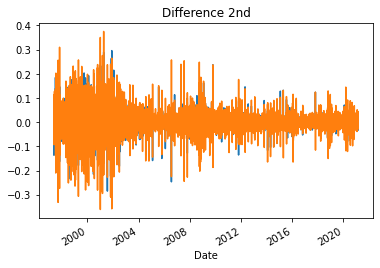

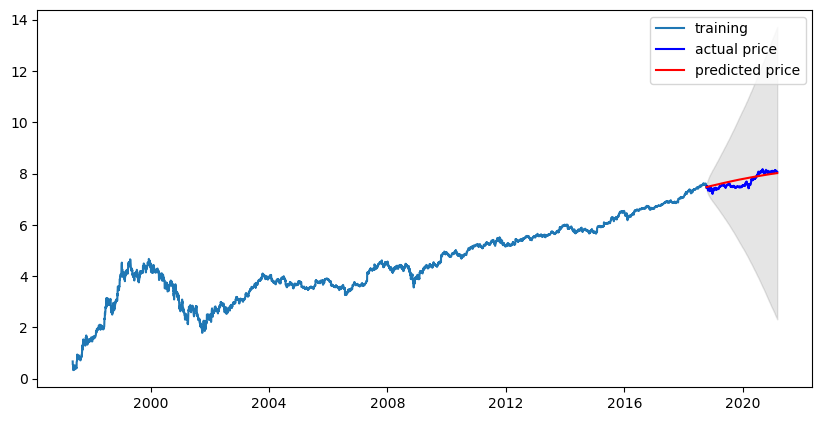

MSE:  140922.90200895732
MAE:  334.70666418824413
RMSE:  375.3969925411728
MAPE: 16.23%


In [481]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/AMZN.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']


ts.head()

# 결측치 처리(보간법)
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

# 로그 변환 시도 
ts_log = np.log(ts)

# 일정 시간내 구간 통계치 시각화.
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 2, 3))
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))